# Homework 10: Saxpy
by Rustam Guseyn-zade ([link canvas](https://skoltech.instructure.com/courses/3546/users/9673))

## Table of contents
* [Difference between cupy and numpy/Data transfers](#Explanation-of-the-difference-between-cupy-and-numpy.-How-does-cupy-handle-data-transfers-between-cpu-and-gpu?)
* [SAXPY on GPU](#SAXPY-on-GPU)
* [GPU vs CPU](#GPU-vs-CPU)

In [1]:
# import needed libraries
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

## Explanation of the difference between cupy and numpy. How does cupy handle data transfers between cpu and gpu?

### Difference between cupy and numpy

Referring to [docs](https://docs.cupy.dev/en/stable/user_guide/basic.html#basics-of-cupy-ndarray) and [another docs](https://docs.cupy.dev/en/stable/user_guide/basic.html#current-device):

> The main difference between cupy.ndarray and numpy.ndarray is that the CuPy arrays are allocated on the current device..

where

> a *current device*, which is the default GPU device on which the allocation, manipulation, calculation, etc., of arrays take place.

### Data transfers between cpu and gpu

Referring to [docs](https://docs.cupy.dev/en/stable/user_guide/basic.html#move-arrays-to-a-device): 
> `cupy.asarray()` can be used to move a `numpy.ndarray`, a list, or any object that can be passed to `numpy.array()` to the current device

and also
> `cupy.asarray()` does not copy the input array if possible. So, if you put an array of the current device, it returns the input object itself.

> If we do copy the array in this situation, you can use `cupy.array()` with `copy=True`. Actually `cupy.asarray()` is equivalent to `cupy.array(arr, dtype, copy=False)`.

## SAXPY on GPU

In [2]:
def np_saxpy(x, y, a):
    return x*a + y

@cp.fuse()
def cp_saxpy(x, y, a):
    return x*a + y

In [10]:
size = 1000
a = np.random.randint(1, 10)
np_x = np.random.rand(size, size).astype(np.float32)
np_y = np.random.rand(size, size).astype(np.float32)

start = time.time()
np_result = np_saxpy(np_x, np_y, a)
end = time.time()
cpu_time = (end - start) * 1000

cp_x = cp.asarray(np_x)
cp_y = cp.asarray(np_y)

start = time.time()
cp_result = cp_saxpy(cp_x, cp_y, a)
end = time.time()
gpu_time = (end - start) * 1000

are_same = np.allclose(np_result, cp.asnumpy(cp_result))
print(f"saxpy on cpu and gpu are{'' if are_same else ' NOT '} same. And were computed respectively in {cpu_time} and {gpu_time} ms")

saxpy on cpu and gpu are same. And were computed respectively in 8.544683456420898 and 0.24771690368652344 ms


## GPU vs CPU

In [11]:
sizes = np.linspace(1, 1e4, 20).astype(int)
cpu_times = []
gpu_times = []
for size in sizes:
  a = np.random.randint(1, 10)
  np_x = np.random.rand(size, size).astype(np.float32)
  np_y = np.random.rand(size, size).astype(np.float32)

  start = time.time()
  np_result = np_saxpy(np_x, np_y, a)
  end = time.time()
  cpu_times.append((end - start) * 1000)

  cp_x = cp.asarray(np_x)
  cp_y = cp.asarray(np_y)
  
  start = time.time()
  cp_result = cp_saxpy(cp_x, cp_y, a)
  end = time.time()
  gpu_times.append((end - start) * 1000)

Text(0.5, 1.0, 'Evolution of cells')

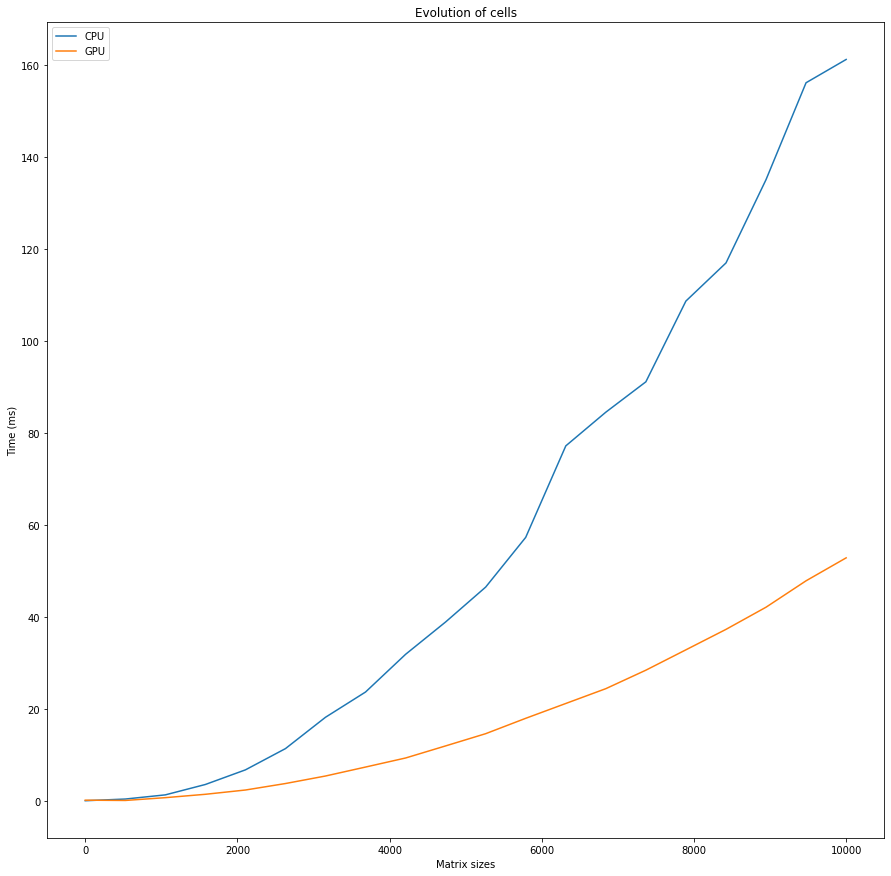

In [12]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot(sizes, cpu_times, label="CPU")
ax.plot(sizes, gpu_times, label="GPU")
plt.legend()
plt.ylabel('Time (ms)')
plt.xlabel('Matrix sizes')
plt.title('Evolution of cells')